## Code for training, testing and visualization of random forest regressors used to estimate magnitude from the Cua & Heaton (2009) group motion predictions at triggers 

In [1]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

## Calculate the envelope amplitude

In [2]:
class envelope_amplitude(object):
    
    def __init__(self):
        pass
    
    def calc_envelope_amplitude(self, M,Rjb,evdp,IM,ZH,PS,RS,Sigma):
        '''
        # Cua and Heaton 2007 relationships
        # IM = {PGA, PGV, FD}, where FD = 3 sec high pass filtered displacement
        # ZH = {Z,H}, where Z=vertical, H=horizontal
        # PS = {P, S}, P=P-wave, S=S-wave
        # RS = {Rock, Soil}, where Rock is for sites w/ NEHRP class BC and above,
        # Soil is for sites w/ NEHRP class C and below

        # note: output units are PGA (cm/s/s), PGV (cm/s), FD (cm)
        # y is median ground motion level
        # up is median + sigma
        # low is median - sigma
        # sigma is in log10 
        
        '''

        #global IM ZH PS RS
        R1=np.sqrt(Rjb**2 + evdp)

        a,b,c1,c2,d,e,sigma = self.__get_coeffs_CH2007__(IM,ZH,PS,RS)

        if Sigma != 0:
            sigma=Sigma
        
        CM=c1*np.exp(c2*(M-5))*(np.arctan(M-5)+np.pi / 2.)
        log10Y= a*M - b*(R1+CM) - d*np.log10(R1+CM) + e
        logup=log10Y + sigma
        loglow=log10Y - sigma


        #y=pow(10, log10Y)/100./9.81
        #up=pow(10, logup)/100./9.81
        #low=pow(10, loglow)/100./9.81

        return log10Y, sigma
    
    def __get_coeffs_CH2007__(self, IM, ZH, PS, RS):
        if IM == 'PGA' and ZH =='H' and PS == 'P' and RS == 'R':
            a = 0.72
            b=  3.3e-3
            c1= 1.6
            c2= 1.05
            d = 1.2
            e =-1.06
            sigma=0.31

        elif IM == 'PGA' and ZH =='H' and PS == 'P' and RS == 'S':
            a=0.74
            b= 3.3e-3
            c1= 2.41
            c2= 0.95
            d = 1.26
            e =-1.05
            sigma= 0.29

        elif IM == 'PGV' and ZH =='H' and PS == 'P' and RS == 'R':
            a=0.80
            b=8.4e-4
            c1=0.76
            c2=1.03
            d=1.24
            e=-3.103
            sigma=0.27

        elif IM == 'PGV' and ZH =='H' and PS == 'P' and RS == 'S':
            a=0.84
            b=5.4e-4
            c1=1.21
            c2=0.97
            d= 1.28
            e= -3.13
            sigma=0.26

        elif IM == 'FD' and ZH =='H' and PS == 'P' and RS == 'R':
            a=0.95
            b=1.7e-7
            c1=2.16
            c2=1.08
            d=1.27
            e=-4.96
            sigma=0.28

        elif IM == 'FD' and ZH =='H' and PS == 'P' and RS == 'S':
            a=0.94
            b=5.17e-7
            c1=2.26
            c2=1.02
            d=1.16
            e=-5.01
            sigma=0.3

        elif IM == 'PGA' and ZH =='H' and PS == 'S' and RS == 'R':
            a=0.733
            b=7.216e-4
            d=1.48
            c1=1.16
            c2=0.96
            e=-0.4202
            sigma=0.3069

        elif IM == 'PGA' and ZH =='H' and PS == 'S' and RS == 'S':
            a=0.709
            b=2.3878e-3
            d=1.4386
            c1=1.722
            c2=0.9560
            e=-2.4525e-2
            sigma=0.3261

        elif IM == 'PGV' and ZH =='H' and PS == 'S' and RS == 'R':
            a=0.861988
            b=5.578e-4
            d=1.36760
            c1=0.8386
            c2=0.98
            e=-2.58053
            sigma=0.2773

        elif IM == 'PGV' and ZH =='H' and PS == 'S' and RS == 'S':
            a=0.88649
            b=8.4e-4
            d=1.4729
            c1=1.39
            c2=0.95
            e=-2.2498
            sigma=0.3193

        elif IM == 'FD' and ZH =='H' and PS == 'S' and RS == 'R':
            a=1.03
            b=1.01e-7
            c1=1.09
            c2=1.13
            d=1.43
            e=-4.34
            sigma=0.27

        elif IM == 'FD' and ZH =='H' and PS == 'S' and RS == 'S':
            a=1.08
            b=1.2e-6
            c1=1.95
            c2=1.09
            d=1.56
            e=-4.1
            sigma=0.32

        elif IM == 'PGA' and ZH =='Z' and PS == 'P' and RS == 'R':
            a=0.74
            b=4.01e-3
            c1=1.75
            c2=1.09
            d=1.2
            e=-0.96
            sigma=0.29

        elif IM == 'PGA' and ZH =='Z' and PS == 'P' and RS == 'S':
            a=0.74
            b=5.17e-7
            c1=2.03
            c2=0.97
            d=1.2
            e=-0.77
            sigma=0.31

        elif IM == 'PGV' and ZH =='Z' and PS == 'P' and RS == 'R':
            a=0.82
            b=8.54e-4
            c1=1.14
            c2=1.11
            d=1.36
            e=-2.90057
            sigma=0.26

        elif IM == 'PGV' and ZH =='Z' and PS == 'P' and RS == 'S':
            a=0.81
            b=2.65e-6
            c1=1.4
            c2=1.0
            d=1.48
            e=-2.55
            sigma=0.30

        elif IM == 'FD' and ZH =='Z' and PS == 'P' and RS == 'R':
            a=0.96
            b=1.98e-6
            c1=1.66
            c2=1.16
            d=1.34
            e=-4.79
            sigma=0.28

        elif IM == 'FD' and ZH =='Z' and PS == 'P' and RS == 'S':
            a=0.93
            b=1.09e-7
            c1=1.5
            c2=1.04
            d=1.23
            e=-4.74
            sigma=0.31

        elif IM == 'PGA' and ZH =='Z' and PS == 'S' and RS == 'R':
            a= 0.78
            b=2.7e-3
            c1=1.76
            c2=1.11
            d=1.38
            e=-0.75
            sigma=0.30

        elif IM == 'PGA' and ZH =='Z' and PS == 'S' and RS == 'S':
            a=0.75
            b=2.47e-3
            c1=1.59
            c2=1.01
            d=1.47
            e=-0.36
            sigma=0.30

        elif IM == 'PGV' and ZH =='Z' and PS == 'S' and RS == 'R':
            a=0.90
            b=1.03e-3
            c1=1.39
            c2=1.09
            d= 1.51
            e=-2.78
            sigma=0.25

        elif IM == 'PGV' and ZH =='Z' and PS == 'S' and RS == 'S':
            a=0.88
            b=5.41e-4
            c1=1.53
            c2=1.04
            d=1.48
            e=-2.54
            sigma=0.27

        elif IM == 'FD' and ZH =='Z' and PS == 'S' and RS == 'R':
            a=1.04
            b=1.12e-5
            c1=1.38
            c2=1.18
            d=1.37
            e=-4.74
            sigma=0.25

        elif IM == 'FD' and ZH =='Z' and PS == 'S' and RS == 'S':
            a=1.04
            b=4.92e-6
            c1=1.55
            c2=1.08
            d=1.36
            e=-4.57
            sigma=0.28
        return a,b,c1,c2,d,e,sigma

In [3]:
env_amp = envelope_amplitude()

In [4]:
M = 8.5
R = 300
evdp = 9
IM = 'PGA'
ZH = 'H'
PS = 'S'
RS = 'R'
Sigma = 0

vp = 6.10
vs = 3.55

env_amp.calc_envelope_amplitude(M,R,evdp,IM,ZH,PS,RS,Sigma)

(1.6808112975197265, 0.3069)

In [5]:
10**1.6808112975197265 / 100 / 9.81

0.04888124852642055

## Calculate the envelope

In [6]:
class envelope_generator(envelope_amplitude):
    
    def __init__(self):
        self.coef = {}
        self.env_param = {}
        
    def calc_envelope(self, M, R, evdp, vp, vs, IM, ZH, PS, RS, sampling_rate, len_after_decay):
        
        '''
        # Cua and Heaton 2007 relationships
        # IM = {PGA, PGV, FD}, where FD = 3 sec high pass filtered displacement
        # ZH = {Z,H}, where Z=vertical, H=horizontal
        # PS = {P, S}, P=P-wave, S=S-wave
        # RS = {Rock, Soil}, where Rock is for sites w/ NEHRP class BC and above,
        # Soil is for sites w/ NEHRP class C and below
        '''
        
        # get all the coef to calculate the envelope parameter
        self.__get_env_param_coef__(IM, ZH, PS, RS)
        
        # get all 4 parameters for calculate the envelope
        tr, delta_t, tau, gamma = self.__get_env_param__(M, R, IM, ZH, PS, RS)
        
        # calculate the amplitude associate with the wave
        # Note that in Cua's relationship, the depth is fixed at 9.0 km
        log10AMP, sigmaAMP = self.calc_envelope_amplitude(M,R,evdp,IM,ZH,PS,RS,Sigma)
        
        A = 10**log10AMP / 100.
        self.env_param['A'] = A
        
        # get the phase arrival time
        t0 = self.__get_arrival_time__(R, evdp, vp, vs, PS)
        
        # get the envelope, right now, we use a 0.1 s 
        t, env = self.__get_envelope__(tr, delta_t, tau, gamma, A, t0,sampling_rate, len_after_decay)
        
        return t, env
        
    def __get_envelope__(self, tr, delta_t, tau, gamma, A, t0, sampling_rate, len_after_decay):
                
        # the end of the envelope, let's add len_after_decay sec
        t_end = t0 + tr + delta_t + len_after_decay
        
        t = np.arange(0, t_end, 1./sampling_rate)
        
        envelope = np.zeros(len(t))
        
        ix = t < t0
        envelope[ix] = 0
        
        ix = (t>=t0) & (t<t0+tr)
        envelope[ix] = A/tr*(t[ix] - t0)
        
        ix = (t>=t0+tr) & (t<t0+tr+delta_t)
        envelope[ix] = A
        
        ix = t>=t0+tr+delta_t
        envelope[ix] = A/((t[ix]-t0-tr-delta_t+tau)**gamma)
        
        return t, envelope
        
        
    def __get_arrival_time__(self, R, evdp, vp, vs, PS):
        
        dist_hypo = np.sqrt(R**2+evdp**2)
        
        if PS == 'P':
            t = dist_hypo / vp
        elif PS == 'S':
            t = dist_hypo / vs
        
        return t
        
    def __get_env_param__(self, M, R, IM, ZH, PS, RS):
        # the equation
        env_param = lambda alpha, beta, eps, mu: 10**(alpha*M + beta*R + eps*np.log10(R) + mu)
        
        tr = env_param(self.coef['tr']['alpha'], self.coef['tr']['beta'], 
                     self.coef['tr']['eps'], self.coef['tr']['mu'])
        
        delta_t = env_param(self.coef['delta_t']['alpha'], self.coef['delta_t']['beta'], 
                     self.coef['delta_t']['eps'], self.coef['delta_t']['mu'])
        
        tau = env_param(self.coef['tau']['alpha'], self.coef['tau']['beta'], 
                     self.coef['tau']['eps'], self.coef['tau']['mu'])
        
        gamma = env_param(self.coef['gamma']['alpha'], self.coef['gamma']['beta'], 
                     self.coef['gamma']['eps'], self.coef['gamma']['mu'])
        
        self.env_param['tr'] = tr
        self.env_param['delta_t'] = delta_t
        self.env_param['tau'] = tau
        self.env_param['gamma'] = gamma
        
        return tr, delta_t, tau, gamma
        
        # do you want to calculate the uncertainties? Then use the sigma
        
    
    def __get_env_param_coef__(self, IM, ZH, PS, RS):
                
        if IM == 'PGA' and ZH =='H' and PS == 'P' and RS == 'R':
            alpha_tr = 0.06
            beta_tr = 5.5e-4
            eps_tr = 0.27
            mu_tr = -0.37
            sigma_tr = 0.22
            
            alpha_delta = 0.0
            beta_delta = 2.58e-3
            eps_delta = 0.21
            mu_delta = -0.22
            sigma_delta = 0.39
            
            alpha_tau = 0.047
            beta_tau = 0.0
            eps_tau = 0.48
            mu_tau = -0.75
            sigma_tau = 0.28
            
            alpha_gamma = -0.032
            beta_gamma = -1.81e-3
            eps_gamma = -0.1
            mu_gamma = 0.64
            sigma_gamma = 0.16
            
        if IM == 'PGA' and ZH =='H' and PS == 'P' and RS == 'S':
            alpha_tr = 0.07
            beta_tr = 1.2e-3
            eps_tr = 0.24
            mu_tr = -0.38
            sigma_tr = 0.26
            
            alpha_delta = 0.03
            beta_delta = 2.37e-3
            eps_delta = 0.39
            mu_delta = -0.59
            sigma_delta = 0.36
            
            alpha_tau = 0.087
            beta_tau = -1.89e-3
            eps_tau = 0.58
            mu_tau = -0.87
            sigma_tau = 0.31
            
            alpha_gamma = -0.048  # this might be another typo, shouldn't be 0.48
            beta_gamma = -1.42e-3
            eps_gamma = -0.13
            mu_gamma = 0.71
            sigma_gamma = 0.21
            
        if IM == 'PGV' and ZH =='H' and PS == 'P' and RS == 'R':
            alpha_tr = 0.06
            beta_tr = 1.33e-3
            eps_tr = 0.23
            mu_tr = -0.34
            sigma_tr = 0.25
            
            alpha_delta = 0.054
            beta_delta = 1.93e-3
            eps_delta = 0.16
            mu_delta = -0.36
            sigma_delta = 0.40
            
            alpha_tau = 1.86e-2
            beta_tau = 5.37e-5
            eps_tau = 0.41
            mu_tau = -0.51
            sigma_tau = 0.3
            
            alpha_gamma = -0.044
            beta_gamma = -1.65e-3
            eps_gamma = -0.16
            mu_gamma = 0.72
            sigma_gamma = 0.20
            
        if IM == 'PGV' and ZH =='H' and PS == 'P' and RS == 'S':
            alpha_tr = 0.07
            beta_tr = 4.35e-4
            eps_tr = 0.47
            mu_tr = -0.68
            sigma_tr = 0.26
            
            alpha_delta = 0.03
            beta_delta = 2.03e-3
            eps_delta = 0.289
            mu_delta = -0.45
            sigma_delta = 0.40
            
            alpha_tau = 0.0403
            beta_tau = -1.26e-3
            eps_tau = 0.387
            mu_tau = -0.372
            sigma_tau = 0.37
            
            alpha_gamma = -6.17e-2
            beta_gamma = -2.0e-3
            eps_gamma = 0.0
            mu_gamma = 0.578
            sigma_gamma = 0.25
            
        if IM == 'FD' and ZH =='H' and PS == 'P' and RS == 'R':
            alpha_tr = 0.05
            beta_tr = 1.29e-3
            eps_tr = 0.27
            mu_tr = -0.34
            sigma_tr = 0.28
            
            alpha_delta = 0.047
            beta_delta = 0.0
            eps_delta = 0.45
            mu_delta = -0.68
            sigma_delta = 0.43
            
            alpha_tau = 0.0
            beta_tau = 0.0
            eps_tau = 0.19
            mu_tau = -0.07
            sigma_tau = 0.39
            
            alpha_gamma = -0.062
            beta_gamma = -2.3e-3
            eps_gamma = 0.0
            mu_gamma = 0.61
            sigma_gamma = 0.26
            
        if IM == 'FD' and ZH =='H' and PS == 'P' and RS == 'S':
            alpha_tr = 0.05
            beta_tr = 1.19e-3
            eps_tr = 0.47
            mu_tr = -0.58
            sigma_tr = 0.26
            
            alpha_delta = 0.051
            beta_delta = 1.12e-3
            eps_delta = 0.33
            mu_delta = -0.59
            sigma_delta = 0.41
            
            alpha_tau = 0.035
            beta_tau = -1.27e-3
            eps_tau = 0.19
            mu_tau = 0.03
            sigma_tau = 0.43
            
            alpha_gamma = -0.061
            beta_gamma = -1.9e-3
            eps_gamma = 0.11
            mu_gamma = 0.39
            sigma_gamma = 0.31
            
        if IM == 'PGA' and ZH =='H' and PS == 'S' and RS == 'R':
            alpha_tr = 0.064  # This is maybe a typo, it should be 0.064 instead of 0.64
            beta_tr = 0.0
            eps_tr = 0.48
            mu_tr = -0.89
            sigma_tr = 0.23
            
            alpha_delta = 0.0
            beta_delta = -4.87e-4
            eps_delta = 0.13
            mu_delta = 0.0024
            sigma_delta = 0.2
            
            alpha_tau = 0.037
            beta_tau = 0.0
            eps_tau = 0.39
            mu_tau = -0.59
            sigma_tau = 0.18
            
            alpha_gamma = -0.014
            beta_gamma = -5.28e-4
            eps_gamma = -0.11
            mu_gamma = 0.26
            sigma_gamma = 0.09
            
        if IM == 'PGA' and ZH =='H' and PS == 'S' and RS == 'S':
            alpha_tr = 0.055
            beta_tr = 1.21e-3
            eps_tr = 0.34
            mu_tr = -0.66
            sigma_tr = 0.25
            
            alpha_delta = 0.028
            beta_delta = 0.0
            eps_delta = 0.07
            mu_delta = -0.102
            sigma_delta = 0.23
            
            alpha_tau = 0.0557
            beta_tau = -8.2e-4
            eps_tau = 0.51
            mu_tau = -0.68
            sigma_tau = 0.24
            
            alpha_gamma = -0.015
            beta_gamma = -5.89e-4
            eps_gamma = -0.163
            mu_gamma = 0.23
            sigma_gamma = 0.13
            
        if IM == 'PGV' and ZH =='H' and PS == 'S' and RS == 'R':
            alpha_tr = 0.093
            beta_tr = 0.0
            eps_tr = 0.48
            mu_tr = -0.96
            sigma_tr = 0.25
            
            alpha_delta = 0.02
            beta_delta = 0.0
            eps_delta = 0.0
            mu_delta = 0.046
            sigma_delta = 0.23
            
            alpha_tau = 0.029
            beta_tau = 8.0e-4
            eps_tau = 0.25
            mu_tau = -0.31
            sigma_tau = 0.23
            
            alpha_gamma = -0.024
            beta_gamma = -1.02e-3
            eps_gamma = -0.06
            mu_gamma = 0.21
            sigma_gamma = 0.11
            
        if IM == 'PGV' and ZH =='H' and PS == 'S' and RS == 'S':
            alpha_tr = 0.087
            beta_tr = 4.0e-4
            eps_tr = 0.49
            mu_tr = -0.98
            sigma_tr = 0.30
            
            alpha_delta = 0.028
            beta_delta = 0.0
            eps_delta = 0.05
            mu_delta = -0.08
            sigma_delta = 0.23
            
            alpha_tau = 0.045
            beta_tau = -5.46e-4
            eps_tau = 0.46
            mu_tau = -0.55
            sigma_tau = 0.25
            
            alpha_gamma = -0.031
            beta_gamma = -4.61e-4
            eps_gamma = -0.162
            mu_gamma = 0.30
            sigma_gamma = 0.13
            
        if IM == 'FD' and ZH =='H' and PS == 'S' and RS == 'R':
            alpha_tr = 0.109
            beta_tr = 7.68e-4
            eps_tr = 0.38
            mu_tr = -0.87
            sigma_tr = 0.29
            
            alpha_delta = 0.04
            beta_delta = 1.1e-3
            eps_delta = -0.15
            mu_delta = 0.11
            sigma_delta = 0.23
            
            alpha_tau = 0.029
            beta_tau = 0.0
            eps_tau = 0.36
            mu_tau = -0.38
            sigma_tau = 0.26
            
            alpha_gamma = -0.025
            beta_gamma = -4.22e-4
            eps_gamma = -0.145
            mu_gamma = 0.262
            sigma_gamma = 0.12
            
        if IM == 'FD' and ZH =='H' and PS == 'S' and RS == 'S':
            alpha_tr = 0.12
            beta_tr = 0.0
            eps_tr = 0.45
            mu_tr = -0.89
            sigma_tr = 0.34
            
            alpha_delta = 0.03
            beta_delta = 0.0
            eps_delta = 0.037
            mu_delta = -0.066
            sigma_delta = 0.28
            
            alpha_tau = 0.038
            beta_tau = -1.34e-3
            eps_tau = 0.48
            mu_tau = -0.39
            sigma_tau = 0.30
            
            alpha_gamma = -2.67e-2
            beta_gamma = 2.0e-4
            eps_gamma = -0.22
            mu_gamma = 0.27
            sigma_gamma = 0.14
            
        if IM == 'PGA' and ZH =='Z' and PS == 'P' and RS == 'R':
            alpha_tr = 0.06
            beta_tr = 7.45e-4
            eps_tr = 0.37
            mu_tr = -0.51
            sigma_tr = 0.22
            
            alpha_delta = 0.0
            beta_delta = 2.75e-3
            eps_delta = 0.17
            mu_delta = -0.24
            sigma_delta = 0.41
            
            alpha_tau = 0.03
            beta_tau = 0.0
            eps_tau = 0.58
            mu_tau = -0.97
            sigma_tau = 0.26
            
            alpha_gamma = -0.027
            beta_gamma = -1.75e-3
            eps_gamma = -0.18
            mu_gamma = 0.74
            sigma_gamma = 0.15
            
        if IM == 'PGA' and ZH =='Z' and PS == 'P' and RS == 'S':
            alpha_tr = 0.06
            beta_tr = 5.87e-4
            eps_tr = 0.23
            mu_tr = -0.37
            sigma_tr = 0.23
            
            alpha_delta = 0.0
            beta_delta = 1.76e-3
            eps_delta = 0.36
            mu_delta = -0.48
            sigma_delta = 0.41
            
            alpha_tau = 0.057
            beta_tau = -1.36e-3
            eps_tau = 0.63
            mu_tau = -0.96
            sigma_tau = 0.28
            
            alpha_gamma = -0.024
            beta_gamma = -1.6e-3
            eps_gamma = -0.24
            mu_gamma = 0.84
            sigma_gamma = 0.18
            
        if IM == 'PGV' and ZH =='Z' and PS == 'P' and RS == 'R':
            alpha_tr = 0.06
            beta_tr = 7.32e-4
            eps_tr = 0.25
            mu_tr = -0.37
            sigma_tr = 0.26
            
            alpha_delta = 0.046
            beta_delta = 2.61e-3
            eps_delta = 0.0
            mu_delta = -0.21
            sigma_delta = 0.41
            
            alpha_tau = 0.03
            beta_tau = 8.6e-4
            eps_tau = 0.35
            mu_tau = -0.62
            sigma_tau = 0.29
            
            alpha_gamma = -0.039
            beta_gamma = -1.9e-3
            eps_gamma = -0.18
            mu_gamma = 0.76
            sigma_gamma = 0.18
            
        if IM == 'PGV' and ZH =='Z' and PS == 'P' and RS == 'S':
            alpha_tr = 0.06
            beta_tr = 1.1e-3
            eps_tr = 0.22
            mu_tr = -0.36
            sigma_tr = 0.24
            
            alpha_delta = 0.031
            beta_delta = 1.7e-3
            eps_delta = 0.26
            mu_delta = -0.52
            sigma_delta = 0.42
            
            alpha_tau = 0.031       # another typo? 0.031 instead of 0.31
            beta_tau = -6.4e-4
            eps_tau = 0.44
            mu_tau = -0.55
            sigma_tau = 0.32
            
            alpha_gamma = -0.037
            beta_gamma = -2.23e-3
            eps_gamma = -0.14
            mu_gamma = 0.71
            sigma_gamma = 0.22
            
        if IM == 'FD' and ZH =='Z' and PS == 'P' and RS == 'R':
            alpha_tr = 0.08
            beta_tr = 1.63e-3
            eps_tr = 0.13
            mu_tr = -0.33
            sigma_tr = 0.27
            
            alpha_delta = 0.058
            beta_delta = 2.02e-3
            eps_delta = 0.0
            mu_delta = -0.25
            sigma_delta = 0.42
            
            alpha_tau = 0.05
            beta_tau = 8.9e-4
            eps_tau = 0.16
            mu_tau = -0.39
            sigma_tau = 0.36
            
            alpha_gamma = -0.052
            beta_gamma = 1.67e-3
            eps_gamma = -0.21
            mu_gamma = 0.85
            sigma_gamma = 0.22
            
        if IM == 'FD' and ZH =='Z' and PS == 'P' and RS == 'S':
            alpha_tr = 0.067
            beta_tr = 1.21e-3
            eps_tr = 0.28
            mu_tr = -0.46
            sigma_tr = 0.27
            
            alpha_delta = 0.043
            beta_delta = 9.94e-4
            eps_delta = 0.19
            mu_delta = -0.42
            sigma_delta = 0.41
            
            alpha_tau = 0.052
            beta_tau = 0.0
            eps_tau = 0.12
            mu_tau = -0.17
            sigma_tau = 0.39
            
            alpha_gamma = -0.7
            beta_gamma = -2.5e-3
            eps_gamma = 0.0
            mu_gamma = 0.63
            sigma_gamma = 0.27
            
        if IM == 'PGA' and ZH =='Z' and PS == 'S' and RS == 'R':
            alpha_tr = 0.069
            beta_tr = 0.0
            eps_tr = 0.49
            mu_tr = -0.97
            sigma_tr = 0.23
            
            alpha_delta = 0.03
            beta_delta = -1.4e-3
            eps_delta = 0.22
            mu_delta = -0.17
            sigma_delta = 0.20
            
            alpha_tau = 0.031
            beta_tau = 0.0
            eps_tau = 0.34
            mu_tau = -0.44
            sigma_tau = 0.19
            
            alpha_gamma = 0.015
            beta_gamma = -4.64e-4
            eps_gamma = -0.12
            mu_gamma = 0.26
            sigma_gamma = 0.095
            
        if IM == 'PGA' and ZH =='Z' and PS == 'S' and RS == 'S':
            alpha_tr = 0.059
            beta_tr = 2.18e-3
            eps_tr = 0.26
            mu_tr = -0.66
            sigma_tr = 0.25
            
            alpha_delta = 0.03
            beta_delta = -1.78e-3
            eps_delta = 0.31
            mu_delta = -0.31
            sigma_delta = 0.25
            
            alpha_tau = 0.06
            beta_tau = -1.45e-3
            eps_tau = 0.51
            mu_tau = -0.6
            sigma_tau = 0.22
            
            alpha_gamma = -0.02
            beta_gamma = 0.0
            eps_gamma = -0.24
            mu_gamma = 0.38
            sigma_gamma = 0.13
            
        if IM == 'PGV' and ZH =='Z' and PS == 'S' and RS == 'R':
            alpha_tr = 0.12
            beta_tr = 0.0
            eps_tr = 0.50
            mu_tr = -1.14
            sigma_tr = 0.27
            
            alpha_delta = 0.018
            beta_delta = 0.0
            eps_delta = 0.0
            mu_delta = -0.072
            sigma_delta = 0.23
            
            alpha_tau = 0.04
            beta_tau = 9.4e-4
            eps_tau = 0.25
            mu_tau = -0.34
            sigma_tau = 0.23
            
            alpha_gamma = -0.028
            beta_gamma = -8.32e-4
            eps_gamma = -0.12
            mu_gamma = 0.32
            sigma_gamma = 0.11
            
        if IM == 'PGV' and ZH =='Z' and PS == 'S' and RS == 'S':
            alpha_tr = 0.11
            beta_tr = 1.24e-3
            eps_tr = 0.38
            mu_tr = -0.91
            sigma_tr = 0.31
            
            alpha_delta = 0.017
            beta_delta = -6.93e-4
            eps_delta = 0.12
            mu_delta = -0.05
            sigma_delta = 0.27
            
            alpha_tau = 0.051
            beta_tau = -1.41e-3
            eps_tau = 0.44
            mu_tau = -0.37
            sigma_tau = 0.26
            
            alpha_gamma = -0.03
            beta_gamma = 0.0
            eps_gamma = -0.21
            mu_gamma = 0.33
            sigma_gamma = 0.15
            
        if IM == 'FD' and ZH =='Z' and PS == 'S' and RS == 'R':
            alpha_tr = 0.12
            beta_tr = 1.3e-3
            eps_tr = 0.26
            mu_tr = -0.75
            sigma_tr = 0.30
            
            alpha_delta = 0.03
            beta_delta = 2.6e-4
            eps_delta = 0.0
            mu_delta = -0.02
            sigma_delta = 0.25
            
            alpha_tau = 0.02
            beta_tau = 0.0
            eps_tau = 0.30
            mu_tau = -0.22
            sigma_tau = 0.26
            
            alpha_gamma = -0.02
            beta_gamma = 0.0
            eps_gamma = -0.23
            mu_gamma = 0.31
            sigma_gamma = 0.12
            
        if IM == 'FD' and ZH =='Z' and PS == 'S' and RS == 'S':
            alpha_tr = 0.12 
            beta_tr = 0.0
            eps_tr = 0.44
            mu_tr = -0.82
            sigma_tr = 0.40
            
            alpha_delta = 0.02
            beta_delta = -7.18e-4
            eps_delta = 0.07
            mu_delta = -0.005
            sigma_delta = 0.26
            
            alpha_tau = 0.022
            beta_tau = -1.65e-3
            eps_tau = 0.44
            mu_tau = -0.19
            sigma_tau = 0.28
            
            alpha_gamma = -0.018
            beta_gamma = 5.65e-4
            eps_gamma = -0.25
            mu_gamma = 0.24
            sigma_gamma = 0.14
        
        self.coef['tr'] = {}
        self.coef['tr']['alpha'] = alpha_tr
        self.coef['tr']['beta'] = beta_tr
        self.coef['tr']['eps'] = eps_tr
        self.coef['tr']['mu'] = mu_tr
        self.coef['tr']['sigma'] = sigma_tr
        
        self.coef['delta_t'] = {}
        self.coef['delta_t']['alpha'] = alpha_delta
        self.coef['delta_t']['beta'] = beta_delta
        self.coef['delta_t']['eps'] = eps_delta
        self.coef['delta_t']['mu'] = mu_delta
        self.coef['delta_t']['sigma'] = sigma_delta
        
        self.coef['tau'] = {}
        self.coef['tau']['alpha'] = alpha_tau
        self.coef['tau']['beta'] = beta_tau
        self.coef['tau']['eps'] = eps_tau
        self.coef['tau']['mu'] = mu_tau
        self.coef['tau']['sigma'] = sigma_tau
        
        self.coef['gamma'] = {}
        self.coef['gamma']['alpha'] = alpha_gamma
        self.coef['gamma']['beta'] = beta_gamma
        self.coef['gamma']['eps'] = eps_gamma
        self.coef['gamma']['mu'] = mu_gamma
        self.coef['gamma']['sigma'] = sigma_gamma
    

In [7]:
import util.functions as func

## Tune P and S wave relationships

In [8]:
from collections import Counter
import numpy as np

In [9]:
mag_range = np.arange(3.5, 9.1, 0.1)
dist_range = np.arange(1, 300, 1)

In [10]:
n_num = 1000000

mag_selected = np.random.choice(mag_range, size=n_num)
dist_selected = np.random.choice(dist_range, size = n_num)

evdp = 10
IM = 'PGA'
ZH = 'H'
PS = 'P'
Sigma = 0
vp = 6.10
vs = 3.55

#RS_selected = np.random.choice(['R', 'S'], size = n_num)

#Choose rock or soil (only rock at the moment)
#Lets try soil too 
RS_selected = n_num * ['R']

#Choose P or S
PS_selected = np.random.choice(['P', 'S'], size = n_num)
#PS_selected = []

#for i in range(n_num):
    
#    if np.random.rand() < 0.5:
#        PS_selected.append('P')
#    else:
#        PS_selected.append('S')

(array([ 107379.,   89024.,  107022.,   89756.,  106882.,   89185.,
         106623.,   89361.,  107424.,  107344.]),
 array([ 3.5 ,  4.05,  4.6 ,  5.15,  5.7 ,  6.25,  6.8 ,  7.35,  7.9 ,
         8.45,  9.  ]),
 <a list of 10 Patch objects>)

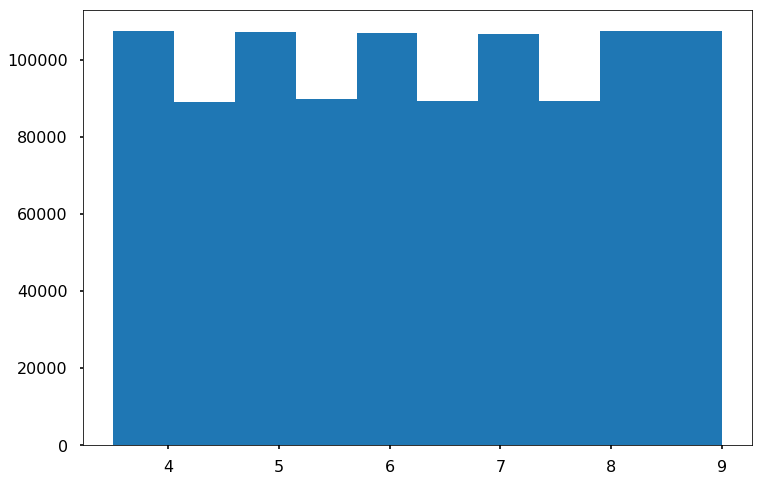

In [11]:
plt.figure(figsize = (12, 8))
plt.hist(mag_selected)

In [12]:
env_amp = envelope_amplitude()
results_list_P = []
results_list_S = []

uncert = True
for M, R, RS, PS in zip(mag_selected, dist_selected, RS_selected, PS_selected):
    
    if PS == 'P':
        log10AMP_P, sigma_P = env_amp.calc_envelope_amplitude(M,R,evdp,'PGA','H',PS,RS,Sigma)
        
        #select values from normal distribution 
        if uncert == True:
            pga_p = pow(10, np.random.normal(log10AMP_P, sigma_P))/100./9.81
        else:
            pga_p = 10**(log10AMP_P)/100./9.81
            
        results_list_P.append([M, pga_p, R, RS])
    else:
        log10AMP_S, sigma_S = env_amp.calc_envelope_amplitude(M,R,evdp,'PGA','H',PS,RS,Sigma)
        
        #select values from normal distribution
        if uncert == True:
            pga_s = pow(10, np.random.normal(log10AMP_S, sigma_S))/100./9.81
        else:
            pga_s = 10**(log10AMP_S)/100./9.81
            
        results_list_S.append([M, pga_s, R, RS])
     
results_list_P = np.array(results_list_P)
results_list_S = np.array(results_list_S)

In [13]:
len(results_list_P)

499310

In [14]:
len(results_list_S)

500690

## Train a random forest regressor for P and S

In [15]:
def make_X_y(results,takelog=True):
    
    y = results[:, 0].astype(float)
    X = results[:, 1:3].astype(float)
    
    if takelog == True:
        X = np.log10(X)
    
    return X,y

In [16]:
Xp, yp = make_X_y(results_list_P,takelog=True)
Xs, ys = make_X_y(results_list_S,takelog=True)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

In [20]:
def perform_grid_search(pipeline_obj,grid_search_obj,X_train,y_train,test_parameters):
    
    '''
    Perform a grid search over hyperparmeters to generate the best model. Takes a generic pipeline object and grid search
    object. Prints the length of time it takes to run a model. Runs GridSearchCV over some input range of parameters to
    select the best model based on score
    '''
    
    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline_obj.steps])
    print("parameters:")
    print(test_parameters)
    t0 = time.time()
    
    #Do the grid search on the training dataset
    grid_search_obj.fit(X_train, y_train)
    
    print("done in %0.3fs" % (time.time() - t0))
    print()

    print("Best score: %0.3f" % grid_search_obj.best_score_)
    print("Best parameters set:")
    best_estimator = grid_search_obj.best_estimator_
    best_parameters = best_estimator.get_params()
    for param_name in sorted(test_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
 
    #Return the best estimator object for use with the holdout dataset
    return best_estimator

In [21]:
def trainRF(model_name,X,y):
    
    '''Conduct a grid search and return the best fitting model. Also save it to disk'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    
    #Parameters to search over
    test_parameters = {
        'reg__n_estimators': (1,100),
        'reg__min_samples_leaf':(1,100,200,300),
        'reg__min_samples_split':(200,250,300)
    }
    
    rf = RandomForestRegressor(n_jobs=4)
    RF_pipeline = Pipeline([('reg', rf)])
    grid_search = GridSearchCV(RF_pipeline, test_parameters,verbose=1, cv=5, n_jobs=-1)
    
    fitted_model = perform_grid_search(RF_pipeline,grid_search,X_train,y_train,test_parameters)
    
    predicted_test = fitted_model.predict(X_test)
    test_score = r2_score(y_test, predicted_test)
    spearman = spearmanr(y_test, predicted_test)
    pearson = pearsonr(y_test, predicted_test)
    print(f'Test data R-2 score: {test_score:>5.3}')
    print(f'Test data Spearman correlation: {spearman[0]:.3}')
    print(f'Test data Pearson correlation: {pearson[0]:.3}')
    
    pickle.dump(fitted_model, open(model_name, 'wb'))
    

def trainRF_known_params(model_name,model,X,y):
    
    '''Train an RF using known paramters (from a grid search that has already been 
    carried out, for example)'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    model.fit(X_train,y_train)

    predicted_test = model.predict(X_test)
    test_score = r2_score(y_test, predicted_test)
    spearman = spearmanr(y_test, predicted_test)
    pearson = pearsonr(y_test, predicted_test)
    print(f'Test data R-2 score: {test_score:>5.3}')
    print(f'Test data Spearman correlation: {spearman[0]:.3}')
    print(f'Test data Pearson correlation: {pearson[0]:.3}')
    
    pickle.dump(model, open(model_name, 'wb'))
    

In [22]:
trainRF_known_params('estimate_magnitude_random_forest_M3pt5_to_M9_with_Uncertainty_P_R2.pkl',\
                    RandomForestRegressor(n_estimators=100,min_samples_leaf=200,min_samples_split=200,n_jobs=4),Xp,yp)

KeyboardInterrupt: 

In [164]:
trainRF_known_params('estimate_magnitude_random_forest_M3pt5_to_M9_with_Uncertainty_S_R2.pkl',\
                    RandomForestRegressor(n_estimators=100,min_samples_leaf=100,min_samples_split=200,n_jobs=4),Xs,ys)

Test data R-2 score: 0.908
Test data Spearman correlation: 0.952
Test data Pearson correlation: 0.953


### Don't run this next part unless we want to do a new grid search (takes a long time)

In [113]:
trainRF('estimate_magnitude_random_forest_M3pt5_to_M9_without_Uncertainty_P_R.pkl',Xp,yp)
trainRF('estimate_magnitude_random_forest_M3pt5_to_M9_withput_Uncertainty_S_R.pkl',Xs,ys)

Performing grid search...
pipeline: ['reg']
parameters:
{'reg__n_estimators': (1, 100), 'reg__min_samples_leaf': (1, 100, 200, 300), 'reg__min_samples_split': (200, 250, 300)}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 23.3min finished


done in 1428.013s

Best score: 0.970
Best parameters set:
	reg__min_samples_leaf: 1
	reg__min_samples_split: 200
	reg__n_estimators: 100
Test data R-2 score: 0.975
Test data Spearman correlation: 0.989
Test data Pearson correlation: 0.987
Performing grid search...
pipeline: ['reg']
parameters:
{'reg__n_estimators': (1, 100), 'reg__min_samples_leaf': (1, 100, 200, 300), 'reg__min_samples_split': (200, 250, 300)}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 21.3min finished


done in 1300.943s

Best score: 1.000
Best parameters set:
	reg__min_samples_leaf: 1
	reg__min_samples_split: 200
	reg__n_estimators: 100
Test data R-2 score:   1.0
Test data Spearman correlation: 1.0
Test data Pearson correlation: 1.0


## Visualize RF

In [23]:
rf_p = pickle.load(open('estimate_magnitude_random_forest_M3pt5_to_M9_with_Uncertainty_P.pkl', 'rb'))
rf_s = pickle.load(open('estimate_magnitude_random_forest_M3pt5_to_M9_with_Uncertainty_S.pkl', 'rb'))

In [24]:
test_r = np.log10(np.arange(0.01,100)) #random distances
test_pga = np.log10(np.arange(0.01,1,0.01)) #random PGA values

In [25]:
#test_r = np.arange(0.01,100) #random distances
#test_pga = np.arange(0.01,1,0.01) #random PGA values

In [26]:
test = np.zeros((1,2))
for r in test_r:
    test = np.concatenate((test, np.c_[test_pga, [r]*len(test_pga)]))

### Look at the output from the P wave model

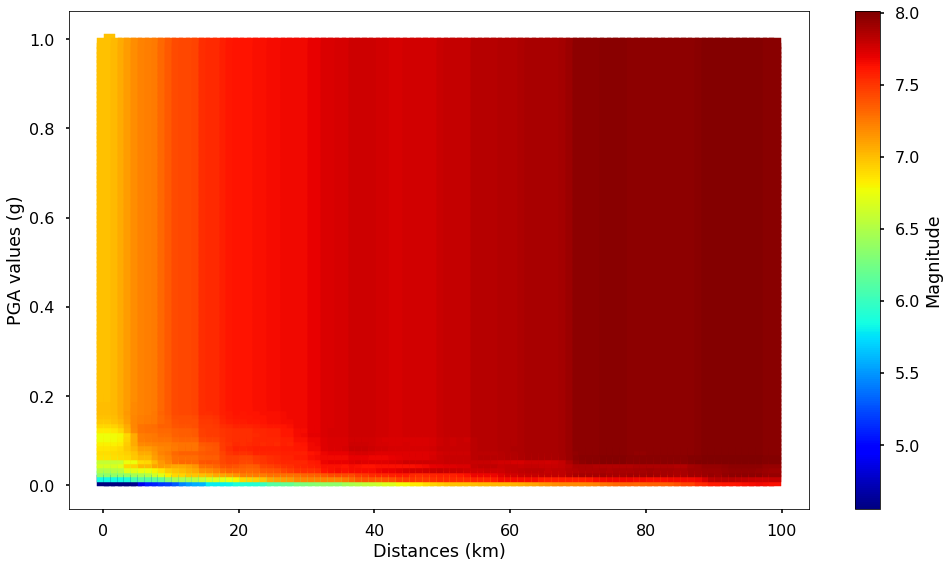

In [27]:
mag_est = rf_p.predict(test)
ix = mag_est < 10
plt.figure(figsize = (14,8))
plt.scatter(10**test[:, 1][ix], 10**test[:, 0][ix], c = mag_est[ix], cmap=plt.jet(),marker='s')
cbar = plt.colorbar()
cbar.set_label('Magnitude')
plt.xlabel('Distances (km)')
plt.ylabel('PGA values (g)')
plt.tight_layout()
plt.savefig('RF_pmodel_vis_R_no_uncert.pdf')

### Look at the output from the S-wave model

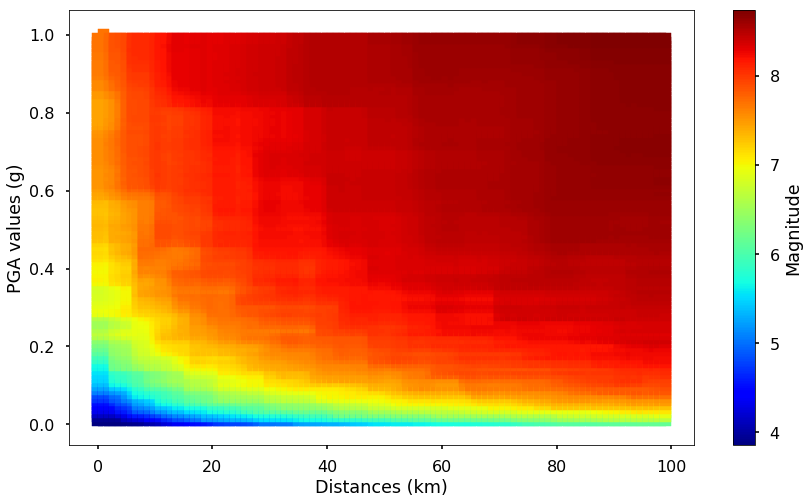

In [28]:
mag_est = rf_s.predict(test)
ix = mag_est < 10
plt.figure(figsize = (14,8))
plt.scatter(10**test[:, 1][ix], 10**test[:, 0][ix], c = mag_est[ix], cmap=plt.jet(),marker='s')
cbar = plt.colorbar()
cbar.set_label('Magnitude')
plt.xlabel('Distances (km)')
plt.ylabel('PGA values (g)')
plt.savefig('RF_smodel_vis_R_no_uncert.pdf')

## Let's do a quick test to see how the models perform

In [29]:
def weighted_mag_average(mags_from_p,mags_from_s,p_weight):
    
    '''Downweight the p trigger values by some value to make the estimate more accurate'''
    
    final_sum_n = len(mags_from_s)+p_weight*len(mags_from_p)
    final_sum = sum(list(p_weight*mags_from_p)+list(mags_from_s))
    
    return final_sum/final_sum_n
    

In [31]:
mag_list = []
std_p_list = []
std_s_list = []
mu_p_list = []
mu_s_list = []

p_weight=0.1
for mag in np.arange(3.5, 9.1, 0.1):
    pga_threshold = 0.01
    discount_factor = 0.7
    trig_list_p = []
    trig_list_s = []
    
    
    trig_std_p = []
    trig_std_s = []
    trig_mu_s = []
    trig_mu_p = []
    
    for i in range(100):
        
        #Rsndomly choose 100 distance values 
        dist = np.random.choice(range(1, 100))
        #RS = np.random.choice(['R', 'S'])
        RS = 'R'

        logpga_p, sigma_p = env_amp.calc_envelope_amplitude(mag,dist,10,'PGA',ZH = 'H',PS = 'P',RS = RS, Sigma = 0)
        logpga_s, sigma_s = env_amp.calc_envelope_amplitude(mag,dist,10,'PGA',ZH = 'H',PS = 'S',RS = RS, Sigma = 0)
        trig_std_p.append(sigma_p)
        trig_std_s.append(sigma_s)
        
        trig_mu_p.append(10**(logpga_p)/100.0/9.81)
        trig_mu_s.append(10**(logpga_s)/100.0/9.81)
        
        if uncert == True:
            
            pga_p = pow(10, np.random.normal(logpga_p, sigma_p))/100./9.81
            pga_s = pow(10, np.random.normal(logpga_s,sigma_s))/100./9.81
        
        else:
            
            pga_p = 10**(logpga_p)/100./9.81
            pga_s = 10**(logpga_s)/100./9.81
        

        prob_trig_p = pga_p / pga_threshold
        prob_trig_s = pga_s / pga_threshold

        if prob_trig_p >= 1:
            prob_trig_p = 1
        else:
            prob_trig_p = 0.0

        if prob_trig_s > 1:
            prob_trig_s = 1
        else:
            prob_trig_s = 0.0

        p = prob_trig_p * discount_factor

        # if it triggers on P
        if np.random.rand() <= p:
            
            if np.random.rand() <= 0.7:
                PS = 1
            else:
                PS = np.random.choice([0, 1])
                
            if PS == 1:
                trig_list_p.append([pga_p, dist])
            else:
                trig_list_s.append([pga_p, dist])
            
            continue

        # if it triggers on S
        p = prob_trig_s * discount_factor
        if np.random.rand() <= p:
            if np.random.rand() <= 0.7:
                PS = 0
            else:
                PS = np.random.choice([0, 1])
                
            if PS == 1:
                trig_list_p.append([pga_s,dist])
            else:
                trig_list_s.append([pga_s, dist])
                
            continue
    
    if len(trig_list_p) > 0:
        mags_from_p = rf_p.predict(np.log10(np.array(trig_list_p)))
    else:
        mags_from_p = np.empty(1)
    
    if len(trig_list_s) > 0:
        mags_from_s = rf_s.predict(np.log10(np.array(trig_list_s)))
    else:
        mags_from_s = np.empty(1)
    
    weighted_mean = weighted_mag_average(mags_from_p,mags_from_s,p_weight)
    print('True mag: %.3f --- Mean P mag: %.3f --- Mean S mag: %.3f --- Weighted mag: %.3f' %(\
            mag,np.mean(mags_from_p),np.mean(mags_from_s),weighted_mean))

    mag_est = np.mean(list(mags_from_p)+list(mags_from_s))
    std_p_mean = np.mean(trig_std_p)
    std_s_mean = np.mean(trig_std_s)
    
    std_p_list.append(std_p_mean)
    std_s_list.append(std_s_mean)
    
    mu_p_list.append(np.mean(trig_mu_p))
    mu_s_list.append(np.mean(trig_mu_s))

    mag_list.append([mag, weighted_mean, mag_est])
    
mag_list = np.array(mag_list)

True mag: 3.500 --- Mean P mag: 6.417 --- Mean S mag: 4.043 --- Weighted mag: 4.192
True mag: 3.600 --- Mean P mag: 5.509 --- Mean S mag: 4.055 --- Weighted mag: 4.102
True mag: 3.700 --- Mean P mag: 5.298 --- Mean S mag: 4.144 --- Weighted mag: 4.172
True mag: 3.800 --- Mean P mag: 4.964 --- Mean S mag: 4.460 --- Weighted mag: 4.467
True mag: 3.900 --- Mean P mag: 5.296 --- Mean S mag: 4.289 --- Weighted mag: 4.360
True mag: 4.000 --- Mean P mag: 0.307 --- Mean S mag: 4.917 --- Weighted mag: 4.768
True mag: 4.100 --- Mean P mag: 5.881 --- Mean S mag: 4.487 --- Weighted mag: 4.544
True mag: 4.200 --- Mean P mag: 5.849 --- Mean S mag: 4.549 --- Weighted mag: 4.603
True mag: 4.300 --- Mean P mag: 6.186 --- Mean S mag: 4.701 --- Weighted mag: 4.749
True mag: 4.400 --- Mean P mag: 6.220 --- Mean S mag: 4.521 --- Weighted mag: 4.613
True mag: 4.500 --- Mean P mag: 6.271 --- Mean S mag: 5.023 --- Weighted mag: 5.153
True mag: 4.600 --- Mean P mag: 6.373 --- Mean S mag: 4.624 --- Weighted mag

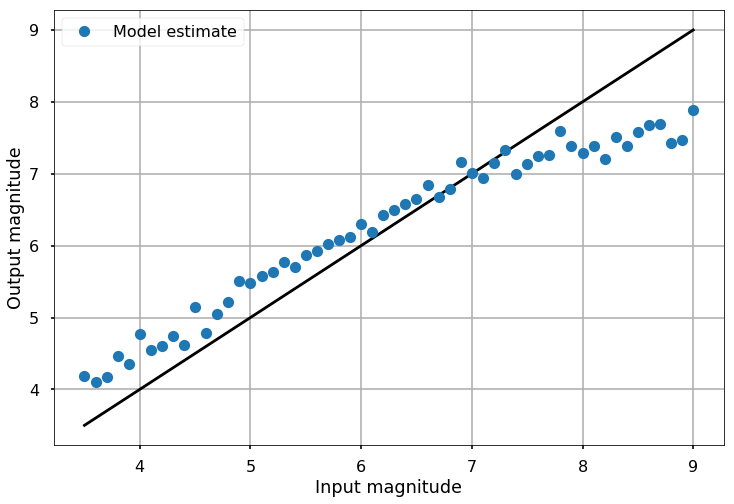

In [37]:
plt.figure(figsize = (12, 8))
#plt.plot(mag_list[:, 0], mag_list[:, 2], 'o',label='regular estimate')
mag_range = np.arange(3.5, 9.1, 0.1)
plt.plot(mag_range, mag_range, 'k-',alpha=1)
plt.plot(mag_list[:, 0], mag_list[:, 1], 'o',label='Model estimate',alpha=1)
plt.xlabel('Input magnitude')
plt.ylabel('Output magnitude')
plt.legend()
plt.grid()
plt.savefig('estimate_vs_true_mags_R2.pdf',dpi=100)

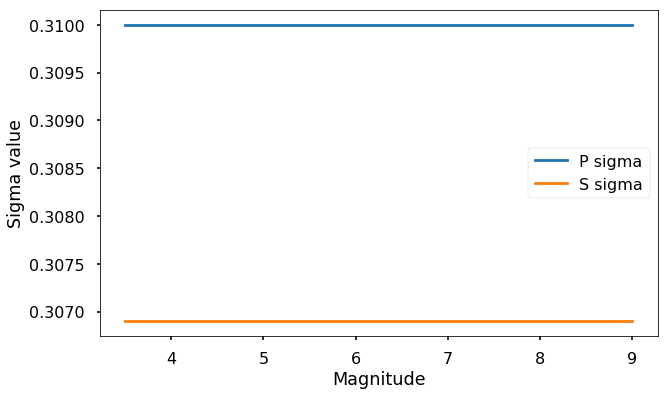

In [105]:
plt.figure(figsize=(10,6))
plt.plot(mag_list[:,0],std_p_list,label='P sigma')
plt.plot(mag_list[:,0],std_s_list,label='S sigma')
plt.legend();
plt.xlabel('Magnitude')
plt.ylabel('Sigma value')
plt.savefig("Sigma_compare_R.png",dpi=200)

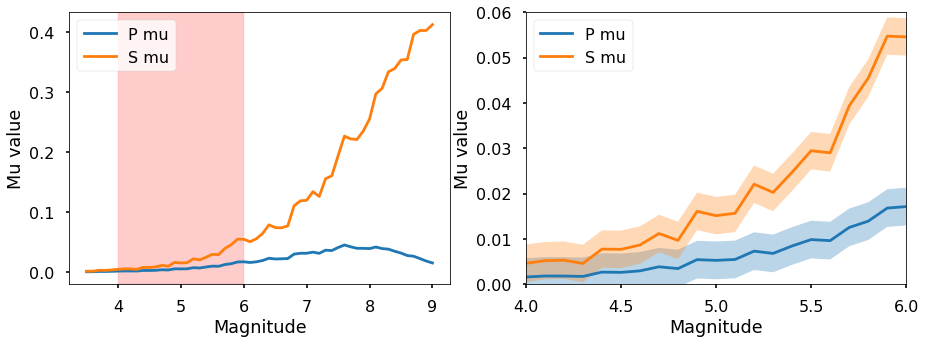

In [29]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(mag_list[:,0],mu_p_list,label='P mu')
ax1.plot(mag_list[:,0],mu_s_list,label='S mu')
ax1.legend();
ax1.axvspan(4,6,alpha=0.2,color='red')
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Mu value')


P_error = 2*10**(std_p_list[0])/100/9.81
S_error = 2*10**(std_s_list[0])/100/9.81

ax2.plot(mag_list[:,0],mu_p_list,label='P mu')
ax2.fill_between(mag_list[:,0],mu_p_list-P_error,mu_p_list+P_error,alpha=0.3)
ax2.plot(mag_list[:,0],mu_s_list,label='S mu')
ax2.fill_between(mag_list[:,0],mu_s_list-S_error,mu_s_list+S_error,alpha=0.3)
ax2.legend();
ax2.set_xlabel('Magnitude')
ax2.set_ylabel('Mu value')
ax2.set_xlim([4,6])
ax2.set_ylim([0,0.06])

plt.savefig("Mu_compare_R.png",dpi=200)